# Importing the Data

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical market data for the last 5 years
nifty50_data = yf.download("^NSEI", period="5y")


[*********************100%%**********************]  1 of 1 completed


In [2]:
Bin_Yearly = nifty50_data['Adj Close'].pct_change(periods=252) * 100
Bin50_Day = nifty50_data['Adj Close'].rolling(window=50).mean()
Bin200_Day = nifty50_data['Adj Close'].rolling(window=200).mean()

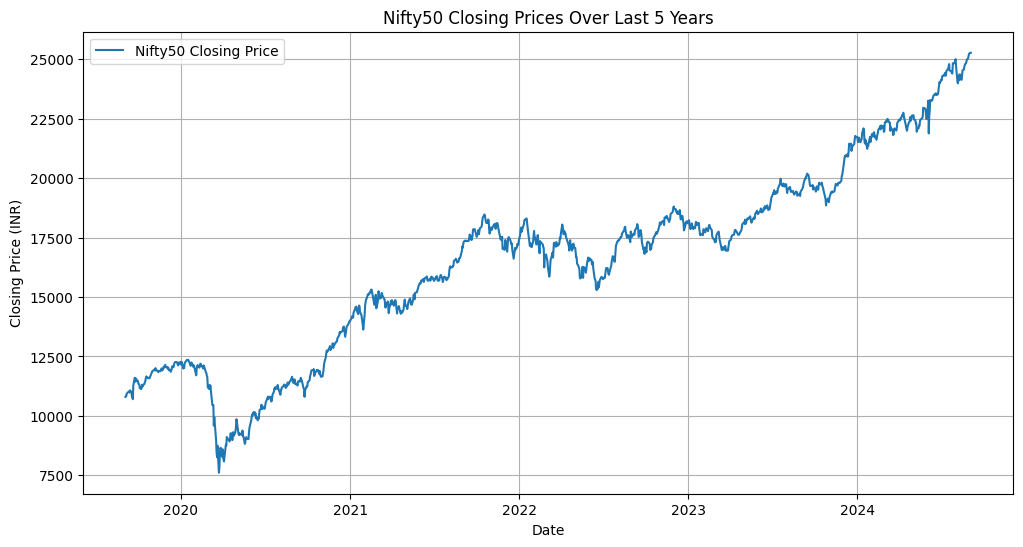

In [3]:
# Perform a simple analysis - plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
plt.title('Nifty50 Closing Prices Over Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# # Moving Average Graph
# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.plot(nifty50_data.index, nifty50_data['50-Day MA'], label='50-Day Moving Average')
# plt.plot(nifty50_data.index, nifty50_data['200-Day MA'], label='200-Day Moving Average')
# plt.title('Nifty50 Closing Prices with 50-Day and 200-Day Moving Averages')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [5]:
# # Yearly Returns Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Yearly Return'], label='Nifty50 Yearly Return')
# plt.title('Nifty50 Yearly Returns Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Yearly Return (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

## Cleaning and Pre processing

In [6]:
if 'Dividends' in nifty50_data.columns and 'Stock Splits' in nifty50_data.columns:
    nifty50_data = nifty50_data.drop(columns=['Dividends', 'Stock Splits', 'Close'])


In [7]:
nifty50_data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
nifty50_data.drop(columns=['Close'], inplace=True)

In [9]:
# nifty50_data = nifty50_data.drop(columns=['50-Day MA', '200-Day MA', 'Yearly Return'])

# nifty50_data.fillna({
#     '50-Day MA': nifty50_data['50-Day MA'].median(),
#     '200-Day MA': nifty50_data['200-Day MA'].median(),
#     'Yearly Return': nifty50_data['Yearly Return'].median()
# }, inplace=True)


Creating 3 bins, 50-Day Average, 200-Day Average, Yearly-Average

In [10]:
Bin50_Day.fillna(Bin50_Day.mode()[0], inplace=True)
Bin200_Day.fillna(Bin200_Day.mode()[0], inplace=True)
Bin_Yearly.fillna(Bin_Yearly.mode()[0], inplace=True)

In [11]:
def showIndexGraphs():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
    
    # Plotting the Histogram
    axes[0].plot(Bin50_Day, label='50-Day MA', color='orange')
    axes[0].plot(Bin200_Day, label='200-Day MA', color='blue')
    axes[0].set_title('20-Day & 50-DayMoving Average Trend Line')
    axes[0].set_ylabel('Year')
    axes[0].set_xlabel('Value')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(Bin_Yearly)
    axes[1].set_title('Yearly Returns Trend Line')
    axes[0].set_xlabel('Year')
    axes[1].set_ylabel('Returns %')
    axes[1].grid(True)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


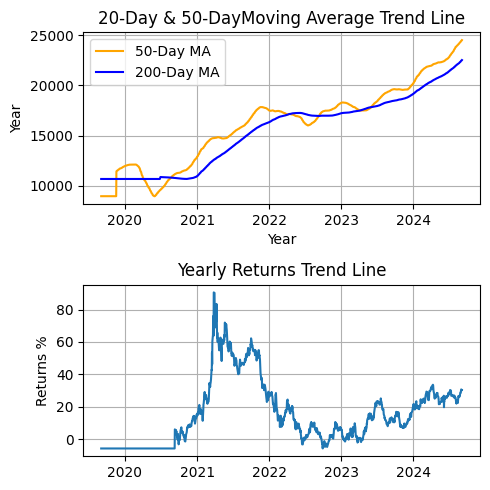

In [12]:
showIndexGraphs()

In [13]:
nifty50_data.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2019-09-03,10960.950195,10967.500000,10772.700195,10797.900391,483000
2019-09-04,10790.400391,10858.750000,10746.349609,10844.650391,508800
2019-09-05,10860.950195,10920.099609,10816.000000,10847.900391,595700
2019-09-06,10883.799805,10957.049805,10867.450195,10946.200195,497200
2019-09-09,10936.700195,11028.849609,10889.799805,11003.049805,412500


Normalizing the Dataset

In [14]:
import numpy as np

nifty_open_scaled = (nifty50_data['Open'] - np.min(nifty50_data['Open'])) / (np.max(nifty50_data['Open']) - np.min(nifty50_data['Open']))
nifty_adjclose_scaled = (nifty50_data['Adj Close'] - np.min(nifty50_data['Adj Close'])) / (np.max(nifty50_data['Adj Close']) - np.min(nifty50_data['Adj Close']))
nifty_high_scaled = (nifty50_data['High'] - np.min(nifty50_data['High'])) / (np.max(nifty50_data['High']) - np.min(nifty50_data['High']))
nifty_low_scaled = (nifty50_data['Low'] - np.min(nifty50_data['Low'])) / (np.max(nifty50_data['Low']) - np.min(nifty50_data['Low']))
nifty_volume_scaled = (nifty50_data['Volume'] - np.min(nifty50_data['Volume'])) / (np.max(nifty50_data['Volume']) - np.min(nifty50_data['Volume']))


In [15]:
nifty50_data_df = pd.DataFrame({'open_scaled': nifty_open_scaled, 'high_scaled': nifty_high_scaled, 
                            'adj_close_scaled': nifty_adjclose_scaled, 'low_scaled': nifty_low_scaled,
                              'volume_scaled': nifty_volume_scaled})

In [17]:
nifty50_data_df

,open_scaled,high_scaled,adj_close_scaled,low_scaled,volume_scaled
Date,,,,,
2019-09-03,0.183300,0.169428,0.180403,0.184014,0.266703
2019-09-04,0.173609,0.163141,0.183049,0.182528,0.280950
2019-09-05,0.177618,0.166688,0.183233,0.186457,0.328934
2019-09-06,0.178916,0.168824,0.188796,0.189360,0.274544
2019-09-09,0.181922,0.172975,0.192013,0.190621,0.227775
...,...,...,...,...,...
2024-08-28,0.982794,0.988203,0.987125,0.984702,0.121701
2024-08-29,0.983050,0.991863,0.992762,0.986612,0.195472
2024-08-30,0.995233,0.996225,0.997513,0.997946,0.352402


Here, first, predict the close price in coming 5 years, if it is successful, then moving on to 50-day average, 200-day average, then moving integrating it into a website, then it should store our data in postgres

## Building Bi-LSTM Model